# Missing Values Treatment in Data Science

In an application-orientated field like data science, available datasets are almost always incomplete. Whether you like it or not, missing values treatment will therefore become part of the whole process of data exploration, data cleaning, feature engineering and the development of an analysis model. 

Even in the situation where a data scientist quickly drops incomplete records from a dataset, a missing values treatment has (unconsciously) been chosen. Was it the most appropriate method, though? Or would the analysis outcome become different when a different missing data method was applied? 

In this post, we present an interactive plot that can be used to explore the effect of missing data methods on evaluation error metrics of a data science regression model.  

## Missing data exploration

Consider dataset 'Concrete Slump Test' from https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/. The data consists of 7 numerical features predicting the slump of concrete in centimeters. Because the original dataset does not contain missing values, we generated the missing values with our custom function `delete_data()` (all our functions and simulation code can be found on https://github.com/RianneSchouten/missing_data_science).

Let's quickly explore the incomplete dataset. 

In [37]:
import pandas as pd
data_slump = pd.read_table('Data/slump_test_MCAR.txt', sep='\t')
data_slump.shape

(103, 8)

In [38]:
data_slump.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm)
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,1.030000e+02
mean,0.006036,-0.104102,-0.124301,-0.018298,-0.012871,0.024598,0.054493,-2.004869e-16
std,1.010530,1.012177,1.028261,1.006384,1.050937,0.990258,1.061685,1.004890e+00
min,-1.183465,-1.295953,-1.753063,-1.848249,-1.481747,-2.000638,-1.570661,-2.072577e+00
25%,-0.992366,-1.295953,-0.561920,-0.853710,-0.909064,-0.707455,-0.878176,-4.074917e-01
50%,0.232578,0.206528,-0.000171,-0.157533,-0.246900,-0.022494,0.093523,3.963428e-01
75%,0.943466,0.632010,0.844805,0.582155,0.522643,0.787237,0.796320,6.834265e-01
max,1.835897,1.662472,1.164501,2.129907,3.743983,1.886300,2.576315,1.257594e+00


In [39]:
data_slump.isnull().any()

Cement           True
Slag             True
Fly ash          True
Water            True
SP               True
Coarse Aggr.     True
Fine Aggr.       True
SLUMP(cm)       False
dtype: bool

In [40]:
data_slump.isnull().sum()

Cement          25
Slag            25
Fly ash         25
Water           25
SP              25
Coarse Aggr.    25
Fine Aggr.      25
SLUMP(cm)        0
dtype: int64

In [41]:
data_slump.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm)
0,NaN,NaN,-0.517804,0.638098,NaN,NaN,-0.945600,0.568593
1,-0.852227,1.180482,0.493932,-0.853710,1.238496,-0.465871,0.101456,-2.072577
2,-0.864967,1.163861,0.493932,-0.903437,2.670203,-0.499977,0.053862,-1.957744
3,-0.864967,1.163861,0.482168,-0.903437,3.743983,-0.522715,0.022133,-1.728077
4,-0.966886,NaN,NaN,1.135368,NaN,0.443620,-1.294619,0.224093


An easy way to get rid of missing values is by deleting all incomplete rows. Apart from the fact that this method can result in severely biased outcomes, dropping incomplete rows from the dataset would also make you lose a lot of valuable observed information. 

For example, for our `data_slump`, we would lose half of our dataset. 

In [42]:
data_slump.dropna().shape

(54, 8)

## Missing data mechanisms

In missing data theory, we classify missing values into three kind of problems: MCAR, MAR and MNAR. For any dataset with missing values in a certain feature X, the missing data is: 

- Missing Completely At Random (MCAR) when all values have an equal probability of being missing. 

- Missing At Random (MAR) when the probability of being missing depends on the values of another feature or the outcome variable. For instance, records with high values for outcome variable 'SLUMP' have a higher probability of being missing on feature 'Cement' or 'Water' (maybe because in those cases it is harder to measure these features).

- Missing Not At Random (MNAR) when the probability of being missing in feature X depends on the unobserved (missing) data. This can either be because suitable covariates for explaining missingness have not been recorded (or are otherwise unavailable) or the probability of being missing depends on the missing values itself. Extending the previous example, if the probability of measuring 'Cement' varied according to 'Cement' itself, this is missing not at random. 

Below, Figures 1, 2 and 3 show the effect of MCAR, MAR and MNAR missingness on the multivariate relationship between feature X and outcome variable Y. 

In [43]:
## add figures: Figures/MCAR.pdf, Figures/MAR.pdf, Figures/MNAR.pdf

Based on the observed data alone, we cannot distinguish between MAR and MNAR data. However, there are tests available to distinguish MCAR from the other two. The easiest test is Little's MCAR test (add reference). This test uses a chi-square test to know whether the overall missingness is MCAR. The null hypothesis is defined as: the data is MCAR. When the test returns a p-value smaller than 0.05, the null hypothesis can be rejected.

A basic Little's MCAR test can be extracted from Rianne's github. 

In [48]:
# import RianneSchouten/pymice/exploration/mcar_tests') Hoe doe ik dat? 
import numpy as np
import pandas as pd
import math as ma
import scipy.stats as st

def checks_input_mcar_tests(data):
    """ Checks whether the input parameter of class McarTests is correct
            Parameters
            ----------
            data:
                The input of McarTests specified as 'data'
            Returns
            -------
            bool
                True if input is correct
            """

    if not isinstance(data, pd.DataFrame):
        print("Error: Data should be a Pandas DataFrame")
        return False

    if not any(data.dtypes.values == np.float):
        if not any(data.dtypes.values == np.int):
            print("Error: Dataset cannot contain other value types than floats and/or integers")
            return False

    if not data.isnull().values.any():
        print("Error: No NaN's in given data")
        return False

    return True

class McarTests():

    def __init__(self, data):
        self.data = data

    def mcar_test(self):
        """ Implementation of Little's MCAR test
        Parameters
        ----------
        data: Pandas DataFrame
            An incomplete dataset with samples as index and variables as columns
        Returns
        -------
        p_value: Float
            This value is the outcome of a chi-square statistical test, testing whether the null hypothesis
            'the missingness mechanism of the incomplete dataset is MCAR' can be rejected.
        """

        if not checks_input_mcar_tests(self.data):
            raise Exception("Input not correct")

        dataset = self.data.copy()
        vars = dataset.dtypes.index.values
        n_var = dataset.shape[1]

        # mean and covariance estimates
        # ideally, this is done with a maximum likelihood estimator
        gmean = dataset.mean()
        gcov = dataset.cov()

        # set up missing data patterns
        r = 1 * dataset.isnull()
        mdp = np.dot(r, list(map(lambda x: ma.pow(2, x), range(n_var))))
        sorted_mdp = sorted(np.unique(mdp))
        n_pat = len(sorted_mdp)
        correct_mdp = list(map(lambda x: sorted_mdp.index(x), mdp))
        dataset['mdp'] = pd.Series(correct_mdp, index=dataset.index)

        # calculate statistic and df
        pj = 0
        d2 = 0
        for i in range(n_pat):
            dataset_temp = dataset.loc[dataset['mdp'] == i, vars]
            select_vars = ~dataset_temp.isnull().any()
            pj += np.sum(select_vars)
            select_vars = vars[select_vars]
            means = dataset_temp[select_vars].mean() - gmean[select_vars]
            select_cov = gcov.loc[select_vars, select_vars]
            mj = len(dataset_temp)
            parta = np.dot(means.T, np.linalg.solve(select_cov, np.identity(select_cov.shape[1])))
            d2 += mj * (np.dot(parta, means))

        df = pj - n_var

        # perform test and save output
        p_value = 1- st.chi2.cdf(d2, df)
        rejected = p_value > 0.05

        return "Outcome MCAR-test: p-value = {}, therefore null hypothesis that data is MCAR is {}"\
    .format(p_value, rejected)

    def mcar_t_tests(self):
        """ MCAR tests for each pair of variables
        Parameters
        ----------
        data: Pandas DataFrame
            An incomplete dataset with samples as index and variables as columns
        Returns
        -------
        mcar_matrix: Pandas DataFrame
            A square Pandas DataFrame containing True/False for each pair of variables
            True: Missingness in index variable is MCAR for column variable
            False: Missingness in index variable is not MCAR for column variable
        """

        if not checks_input_mcar_tests(self.data):
            raise Exception("Input not correct")

        dataset = self.data.copy()
        vars = dataset.dtypes.index.values
        mcar_matrix = pd.DataFrame(data=np.zeros(shape=(dataset.shape[1], dataset.shape[1])),
                                   columns=vars, index=vars)

        for var in vars:
            for tvar in vars:
                part_one = dataset.loc[dataset[var].isnull(), tvar].dropna()
                part_two = dataset.loc[~dataset[var].isnull(), tvar].dropna()
                mcar_matrix.loc[var, tvar] = st.ttest_ind(part_one, part_two, equal_var=False).pvalue

        mcar_matrix = mcar_matrix[mcar_matrix.notnull()] > 0.05

        return mcar_matrix

In [49]:
McarTests(data_slump).mcar_test()

'Outcome MCAR-test: p-value = 0.008995931317370864, therefore null hypothesis that data is MCAR is False'

In [50]:
data_slump_MAR = pd.read_table('Data/slump_test_MAR.txt', sep='\t')
McarTests(data_slump_MAR).mcar_test()

'Outcome MCAR-test: p-value = 0.8486283516447674, therefore null hypothesis that data is MCAR is True'

Another way to check whether data is MCAR or not, can be done with `mcar_t_tests`: independent samples t-tests which test whether for a given feature, the observed values of another feature are different from the unobserved values. An important assumption of a t-test is normality, and this test is therefore only reliable for normally distributed features. Function `mcar_t_tests` returns `True` if a row feature is MCAR for the column feature.   

In [53]:
McarTests(data_slump).mcar_t_tests()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm)
Cement,False,True,True,True,True,True,True,True
Slag,False,False,True,True,True,True,True,True
Fly ash,True,True,False,True,True,True,True,True
Water,True,True,True,False,True,True,True,True
SP,True,True,True,True,False,True,True,True
Coarse Aggr.,True,True,True,True,True,False,True,True
Fine Aggr.,True,True,True,True,True,True,False,True
SLUMP(cm),False,False,False,False,False,False,False,False


## Missing data methods

Because of the large collection of possible methods for dealing with missing data, it can be hard to choose a method for your situation. It is easy to implement a method such as `dropna()` or use the `mean` or `median` imputation functions from `.Imputer` from Scikit-learn. But which of those methods is best? 

In our simulation, we implemented the following imputation methods: 

- Mean imputation: imputation with the column (feature) mean
- Median imputation: imputation with the column (feature) median
- Random imputation: we randomly choose an unobserved value from the column (feature)
- Regression imputation: each column (feature) is regressed on the other features. Each incomplete value is predicted with the observed values of the other features. When a predictive value is unobserved as well, we first impute this value with the column (feature) mean
- Stochastic regression imputation: to account for the uncertainty of the regression model, we add (or subtract) a random amount from the prediction as obtained with regression imputation

## Simulation setup

We performed an extensive simulation study to test the effect of the missing data methods on the outcome of a regression model. Our setup is as follows:

- We obtained two complete, real datasets and created 6 simulated datasets.
- For each dataset, we generate several percentages of missing values according to the three missingness mechanisms. For this, we created function `delete_data` (in file simulation.ipynb). We assign missing values to all X features, but not to the output variable Y. For MAR missingness, we base the missingess in the X features on the output variable Y.
- In each simulation, the incomplete dataset is split into 60% trainingset and 40% testset. We apply six kinds of missing values treatment: `dropna()`, `mean` and `median` imputation with `.Imputer`, and `random`, `regression` and `stochastic` regression imputation with three custom functions (avaialable in file simulation.ipynb). As our analysis model, we use a simple regression model `LinearRegression()` from `sklearn.linear_model` and evaluate with `sklearn.metrics`: `mean_squared_error` and `explained_variance`. 
- We repeat the second and third step 500 times for the real datasets and 50 times for the six custom datasets. We report the average and IQR of the evaluation metrics. All simulation code can be found in file simulation.ipynb.

## Simulation results

Check the outcome in our interactive plot. Select the dataset, missingness mechanism, evaluation metric, missing data method, whether you want to see the inter quartile range (IQR) and whether you want the percentage of missing rows or the percentage of missing cells.

### Concrete slump test

A linear regression model with the original, complete dataset gives the following evaluation error metrics:

- MAE: 6.5
- MSE: 62.5
- R2: 0.09

Compared with the complete dataset, the average evaluation error metrics after dealing with the missing values are a bit lower for MSE (around 50), comparable for MAE (around 7) and quite higher for R2 (around 0.3). 

For the concrete slump test dataset, a MCAR mechanism would give the lowest MSE, RMSE and MAE value when the `drop.na()` method is used. This performance most probably occurs because of the huge decreases in data records. `random` imputation seems to be the worst method, resulting in explained variance values under 30%.

To distinguish between the four imputation models, we have to zoom the figure. It turns out that for higher missingness percentages, `mean` imputation returns lower MSE values than `median` values. `regression` gives higher values, and `stochastic` regression imputation even higher. Note that the differences between the methods are small, and even though we performed 500 simulations, the IQR of our simulation overlap for all missingness percentages. 

Interestingly, if the missingness mechanism is MAR, `drop.na()` gives MSE and RMSE values comparable with most of the imputation methods. Yet, the explained variance is still the largest of the six missing data methods. For MAR mechanisms, `regression` and `stochastic` imputation become more distinct from `mean` and `median` imputation. This effect is most clear for higher missingness percentages. Apparently, in the MAR situation, the missingness brings such an amount of bias in the prediction of outcome variable 'SLUMP', that it is wiser to use `mean` and `median` imputation. 

With MNAR missingness, the situation becomes comparable with the MCAR missingness. Because in both MCAR and MNAR, the missingness does not depend on the outcome variable 'SLUMP', the performance of the analysis model is not much influenced by the different types of missingness. 

In [ ]:
# 2 example figures van de plot hier

### Forest fires

The forest fires data is obtained from https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/. A linear regression model with the complete dataset gives the following evaluation error metrics:

- MAE: 21.5
- MSE: 4160.6
- R2: -1.88

The MSE outcome of the `drop.na()` method turns out to be quite unstable. The same applies to the other metrics. In addition, `drop.na()` gives extremer values than the other missing data methods. Therefore, it is more useful to unclick the `drop.na()` method and focus on the other methodologies.

It becomes immediately clear that in contrast with the 'Concrete Slump Test' dataset, `regression` imputation now gives results comparable with `mean` and `median` imputation instead of `stochastic` imputation. It is most likely that this has to do with the correlation structure in the data. If the features of a dataset poorly correlate, a mean or median estimate is comparable with a regression estimate. With increasing correlations, independent features have more power in predicting a missing value. Another result of the poor correlation structure in the 'Forest Fires' dataset is the uncertainty of the regression estimates of the imputation regression model. As a result, the amount of noise added to the `stochastic` regression imputed values is quite large and therefore, the results from `stochastic` imputation come close to the results of `random` imputation. 

There seem to be few differences between the three missingness mechanisms. The only distinction between the three mechanisms is that with MAR missingness, the differences between the missing data methods are larger with factor 2. In other words, although the order of the missing data methods is similar for MCAR, MAR and MNAR data, any difference between two missing data methods is twice as large for MAR missingness than for MCAR or MNAR data.  

Note as well that the performance of the Forest Fires model is quite bad. On average we wrongly predict the area of a forest fire with 21.5 hectare. In addition, only 2 to 4 percent of the variance in 'area' is explained by the model. 

In [ ]:
## two plots here.

### Simulated datasets

Our simulation code is available in file generate_data.ipynb. In short, we generated 6 datasets with each 10.000 records with 25 normally distributed features and 20 features with a uniform distribution. We added correlation between the features, such that 3 of the 6 datasets have a poor correlation structure and the other three a rich correlation structure. A continuous output variable is sampled by making a linear equation with the features, with a random weights vector, and the addition of some noise. We generated the output variable with three levels of noise: small, medium and large. 

(array([   44.,    38.,    74.,   140.,  1020.,   584.,   146.,    66.,
           18.,    79.]),
 array([-0.98828885, -0.78945996, -0.59063108, -0.39180219, -0.19297331,
         0.00585558,  0.20468446,  0.40351335,  0.60234223,  0.80117112,  1.        ]),
 <a list of 10 Patch objects>)

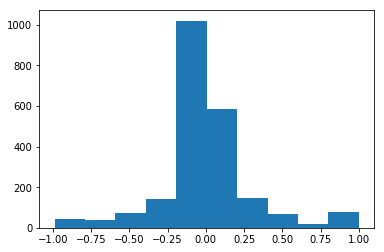

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
df_poor = pd.read_table('Data/custom_dataset_poor_small.txt', sep='\t')
plt.hist(df_poor.corr().values.ravel())

(array([ 592.,  200.,   60.,   50.,  104.,   72.,   78.,   98.,  194.,  761.]),
 array([ -9.99997413e-01,  -7.99997671e-01,  -5.99997930e-01,
         -3.99998189e-01,  -1.99998448e-01,   1.29361235e-06,
          2.00001035e-01,   4.00000776e-01,   6.00000517e-01,
          8.00000259e-01,   1.00000000e+00]),
 <a list of 10 Patch objects>)

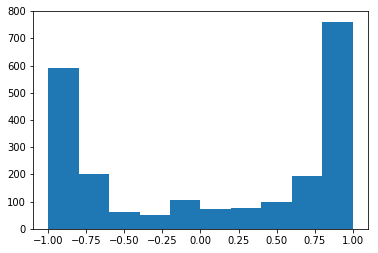

In [26]:
df_rich = pd.read_table('Data/custom_dataset_rich_small.txt', sep = '\t')
plt.hist(df_rich.corr().values.ravel())

If we check the output of the complete datasets, it becomes clear that the simulated datasets are quite perfect datasets. All six datasets have an explained variance perfecentage of 99.99%. The MSE is 0.01 for the datasets with a small amount of noise, 1.0 for the medium datasets and 25 for the data with large amount of noise. The MAE increases from 0.08 to 0.8 to 4.0. 

In [ ]:
# table with output?

The perfect characteristics of these datasets make that the results of certain missing data methods overlap perfect as well (apart from some simulation error). `mean` and `median` imputation give the same results, and `regression` and `stochastic` imputation as well. In addition, the data is that perfect that the loss of records with the `drop.na()` method does not influence the evaluation error metrics. This is the case for all three missingness mechanisms. 

What we can understand from the simulated datasets, is that the performance of `regression` imputation is clearly affected by the correlation structure of the data. Earlier, we saw that `regression` imputation performs comparable with `mean` and `median` imputation when the correlation structure is poor. For the simulated datasets with the poor correlation structure, `regression` imputation gives even lower MSE, RMSE and MAE values than `mean` and `median` imputation. It seems that `regression` imputation is a useful method when the correlation structure of the data is poor. 

In [ ]:
# shot van interactive plot

## Conclusion

The effect of missing values treatment on the outcome of a data science regression model depends on the characteristics of the data. Yet, we can make some general conclusions. 

1. The performance of `Regression` imputation is sensitive for the correlation structure in the data
2. The percentage of missingness is not 

### de missing data is hetzelfde in de trainingset en testset. de drop methode heeft daarom geen invloed op het verschil in de regressielijn. die wordt in de trainingset net zo getrokken als in de testset. de drop methode geeft daarom een goede predictie mse terug, namelijk dichtbij nul. blijkbaar is het zeer goed te doen om in deze data een regressiepredictie van y te maken op basis van de 50 x-en. dat is op zich ook wel logisch want y is gebaseerd op x. hoe is dat als er meer ruis toegevoegd wordt? 

## Contact information

Rianne Schouten, Missing Data Specialist, rianne.schouten@dpa.nl

Coen Seinen, Data Scientist, coen.seinen@bigdatarepublic.nl